In [41]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
#Loading Data set
crm_rawdata=pd.read_csv("crm.csv", sep=';') 

In [38]:
#return the datatype of the varable or object
print(type(crm_rawdata))
print(crm_rawdata.shape)

<class 'pandas.core.frame.DataFrame'>
(448, 23)


In [6]:
#return first five rows
crm_rawdata.head()

,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,RFI,...,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
0,Product A,Seller 6,Mid,Mid,No,Unknown,No,Yes,No,Yes,...,Referral,Current,Clear,Very important,No,Yes,Project,Yes,Strategic account,Won
1,Product B,Seller 8,Mid,Big,No,Yes,No,Unknown,No,No,...,Referral,Current,Clear,Unimportant,No,Yes,Maintenance,Yes,Strategic account,Won
2,Product F,Seller 1,Mid,Big,No,No,Yes,No,No,No,...,Joint past,Current,Few questions,Average important,Yes,No,Project,Info gathering,Strategic account,Won
3,Product B,Seller 8,Mid,Big,No,Yes,No,No,No,No,...,Joint past,Current,Clear,Very important,No,Yes,Maintenance,Yes,Strategic account,Won
4,Product C,Seller 1,Mid,Small,Unknown,No,No,No,No,No,...,Unknown,New,Few questions,Average important,No,No,Project,No,Normal,Won


In [11]:
#return last five rows
crm_rawdata.tail()

,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,RFI,...,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
443,Product D,Seller 2,Low,Mid,Yes,Unknown,No,Unknown,No,Yes,...,Direct mail,New,Clear,Average important,No,No,Solution,Yes,First deal,Lost
444,Product D,Seller 2,Mid,Mid,Yes,Unknown,No,Unknown,No,Yes,...,Direct mail,New,Clear,Average important,No,No,Solution,Yes,First deal,Lost
445,Product D,Seller 2,Mid,Big,Yes,Unknown,No,Yes,Yes,Yes,...,Direct mail,New,Clear,Average important,No,No,Solution,Yes,First deal,Lost
446,Product D,Seller 2,Mid,Mid,Yes,Unknown,No,Unknown,No,Yes,...,Direct mail,New,Clear,Average important,No,No,Solution,Yes,First deal,Lost
447,Product D,Seller 1,Low,Mid,Yes,Unknown,No,Unknown,No,Yes,...,Referral,New,Clear,Average important,No,No,Solution,Yes,First deal,Lost


In [35]:
crm_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       448 non-null    object
 1   Seller        448 non-null    object
 2   Authority     448 non-null    object
 3   Comp_size     448 non-null    object
 4   Competitors   448 non-null    object
 5   Purch_dept    448 non-null    object
 6   Partnership   448 non-null    object
 7   Budgt_alloc   448 non-null    object
 8   Forml_tend    448 non-null    object
 9   RFI           448 non-null    object
 10  RFP           448 non-null    object
 11  Growth        448 non-null    object
 12  Posit_statm   448 non-null    object
 13  Source        448 non-null    object
 14  Client        448 non-null    object
 15  Scope         448 non-null    object
 16  Strat_deal    448 non-null    object
 17  Cross_sale    448 non-null    object
 18  Up_sale       448 non-null    object
 19  Deal_typ

In [36]:
# print column names and its data types
#print(crm_rawdata.dtypes)
#list(crm_rawdata.columns)
#crm_rawdata.columns.values.tolist()

In [37]:
# checking for null values.
#crm_rawdata.isnull()
#crm_rawdata.isnull().sum()

In [20]:
print(crm_rawdata.isnull().values.any())
print(crm_rawdata.isnull().sum().sum())

False
0


In [28]:
#crm_rawdata.describe()

In [25]:
crm_rawdata.iloc[:, :13].describe()

,Product,Seller,Authority,Comp_size,Competitors,Purch_dept,Partnership,Budgt_alloc,Forml_tend,RFI,RFP,Growth,Posit_statm
count,448,448,448,448,448,448,448,448,448,448,448,448,448
unique,14,18,3,3,3,3,2,3,2,2,2,4,3
top,Product D,Seller 1,Mid,Big,No,No,No,Yes,No,Yes,Yes,Stable,Neutral
freq,141,178,399,264,285,302,395,219,396,239,402,403,343


In [27]:
crm_rawdata.iloc[:, 12:].describe()

,Posit_statm,Source,Client,Scope,Strat_deal,Cross_sale,Up_sale,Deal_type,Needs_def,Att_t_client,Status
count,448,448,448,448,448,448,448,448,448,448,448
unique,3,8,3,3,3,2,2,4,4,4,2
top,Neutral,Joint past,Current,Clear,Average important,No,Yes,Project,Yes,Normal,Won
freq,343,339,286,411,296,400,241,279,420,237,227


In [34]:
#crm_rawdata.to_excel(r'CRM_new.xlsx', index = False)

In [39]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     448
unique      2
top       Won
freq      227
Name: Status, dtype: object
mode:  0    Won
dtype: object
Won     227
Lost    221
Name: Status, dtype: int64


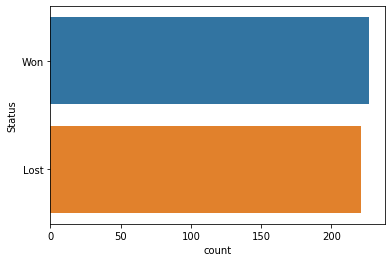

In [42]:
# Target Variable: Survival
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(crm_rawdata, y = 'Status', palette=c_palette)

count           448
unique           14
top       Product D
freq            141
Name: Product, dtype: object
mode:  0    Product D
dtype: object
Product D    141
Product B    122
Product A     67
Product C     36
Product F     22
Product H     22
Product E     12
Product N      8
Product I      7
Product J      4
Product G      3
Product K      2
Product P      1
Product L      1
Name: Product, dtype: int64


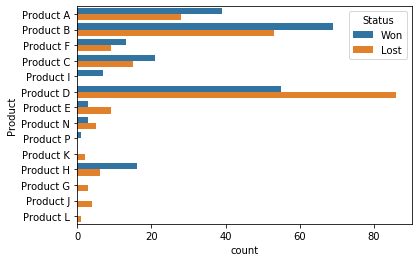

In [43]:
# Feature Variable: Gender
categorical_summarized(crm_rawdata, y = 'Product', hue='Status', palette=c_palette)

count          448
unique          18
top       Seller 1
freq           178
Name: Seller, dtype: object
mode:  0    Seller 1
dtype: object
Seller 1     178
Seller 9     126
Seller 2      65
Seller 3      17
Seller 4      13
Seller 10     11
Seller 14      9
Seller 8       9
Seller 11      4
Seller 6       4
Seller 7       3
Seller 5       2
Seller 12      2
Seller 20      1
Seller 17      1
Seller 13      1
Seller 16      1
Seller 15      1
Name: Seller, dtype: int64


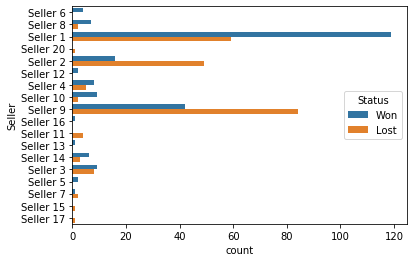

In [44]:
# Feature Variable: Gender
categorical_summarized(crm_rawdata, y = 'Seller', hue='Status', palette=c_palette)

In [51]:
#crm_col_names = crm_rawdata.columns.get_values()
categorical = crm_rawdata.columns.values.tolist()

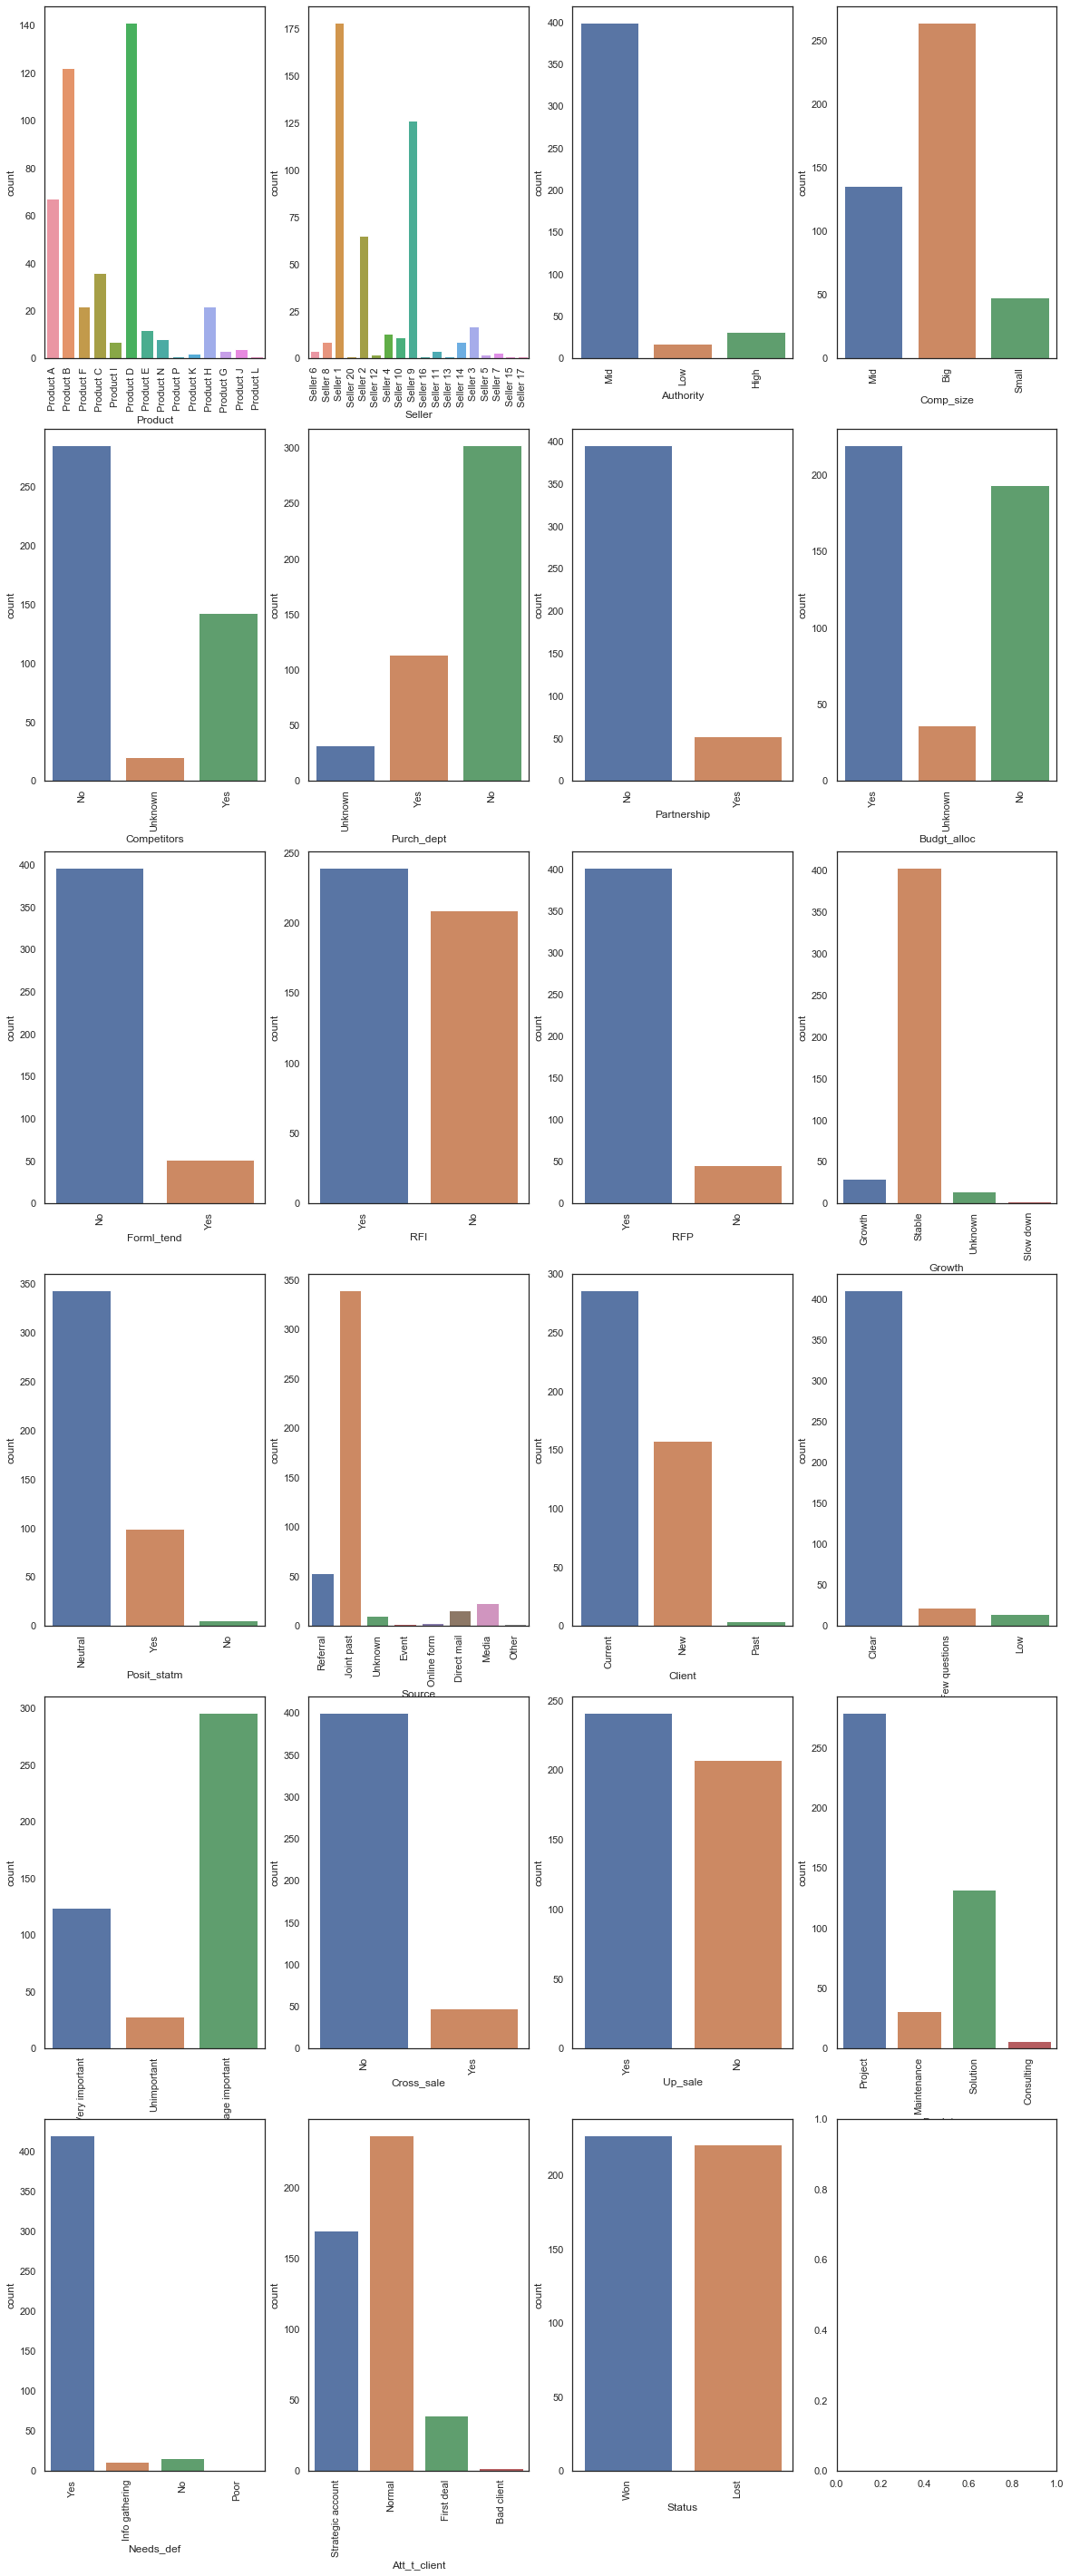

In [70]:
fig, ax = plt.subplots(6, 4, figsize=(20, 50))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(crm_rawdata[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

count     448
unique      3
top       Big
freq      264
Name: Comp_size, dtype: object
mode:  0    Big
dtype: object
Big      264
Mid      136
Small     48
Name: Comp_size, dtype: int64


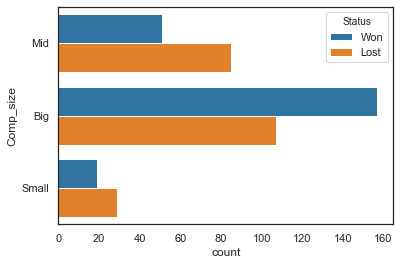

In [72]:
# Feature Variable: Gender
categorical_summarized(crm_rawdata, y = 'Comp_size', hue='Status', palette=c_palette)